   G1  G2  G3  studytime  failures
0   5   6   6          2         0
1   5   5   6          2         0
2   7   8  10          2         3
3  15  14  15          3         0
4   6  10  10          2         0
coefficient:  [ 0.17219196  0.97645262 -0.21584354 -0.23971927]
intercept -1.4379639597635947
12.84688498809924 [13 13  3  0] 13
11.914083947368145 [12 12  2  0] 13
12.30211944984802 [13 12  1  0] 12
10.54959582296533 [11 11  3  0] 10
10.765439364801189 [11 11  2  0] 11
11.109823286089222 [13 11  2  0] 10
9.961178703522268 [12 10  2  0] 11
8.468150199667281 [9 9 2 0] 10
6.515244955821403 [9 7 2 0] 6
15.231477315616834 [13 15  1  0] 15


C:\Users\Pranav\AppData\Local\Temp\ipykernel_19148\256989357.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(data.drop([label], 1))


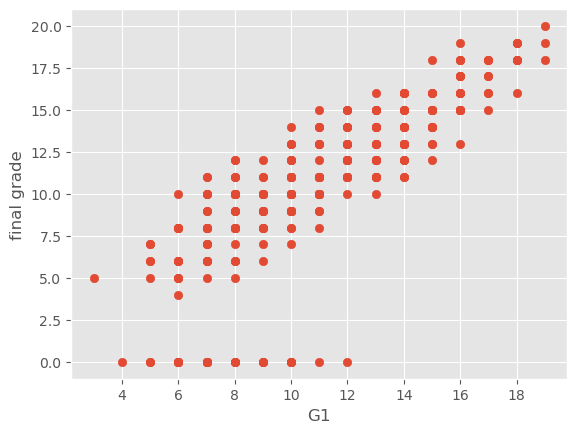

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import  style


data = pd.read_csv("student-mat.csv", sep=";")
data = data[["G1", "G2", "G3", "studytime", "failures"]]

print(data.head())

label = "G3"

x = np.array(data.drop([label], 1))
y = np.array(data[label])
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

# best = 0
# for _ in range(30):
#     x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

#     linear = linear_model.LinearRegression()

#     linear.fit(x_train, y_train)
#     acc = linear.score(x_test, y_test)
#     print(acc)
#     if acc > best:
#         best = acc
#         with open("studentmodel.pickle", "wb") as f:
#             pickle.dump(linear, f)

pickle_in = open("studentmodel.pickle", "rb")
linear = pickle.load(pickle_in)

print("coefficient: ", linear.coef_)
print("intercept", linear.intercept_)

predictions = linear.predict(x_test)

for x in range(10):
    print(predictions[x], x_test[x], y_test[x])

p = 'G1'

style.use("ggplot")
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("final grade")
pyplot.show()